In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "img/05-06-2020_143707/"

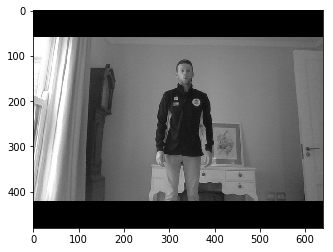

In [4]:
img = cv2.imread(path+"frame150.jpg",0)
plt.imshow(img,cmap='gray')

### Quick look at histogram equalization

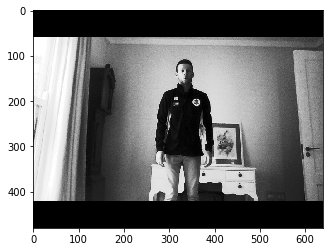

In [8]:
img_clr = cv2.imread(path+"frame150.jpg")
hsv = cv2.cvtColor(img_clr, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
eq_img_clr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(eq_img_clr)

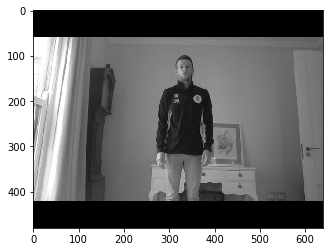

In [103]:
img2 = cv2.imread(path+"frame220.jpg",0)
plt.imshow(img2,cmap='gray')

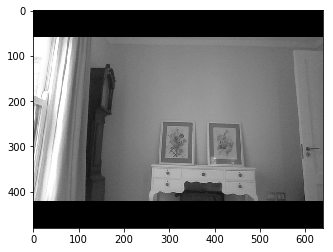

In [104]:
background_img = cv2.imread(path+"frame1.jpg",0)
plt.imshow(background_img,cmap='gray')

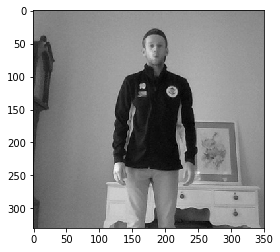

In [105]:
# Process images
roi_x = [150,500]
roi_y = [80,410]

img_roi = img[roi_y[0]:roi_y[1],roi_x[0]:roi_x[1]]
plt.imshow(img_roi,cmap='gray')

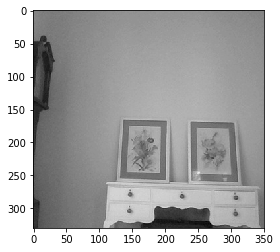

In [106]:
background_roi = background_img[roi_y[0]:roi_y[1],roi_x[0]:roi_x[1]]
plt.imshow(background_roi,cmap='gray')

In [107]:
accumulated_weight = 0.5
background = background_roi.copy().astype("float")


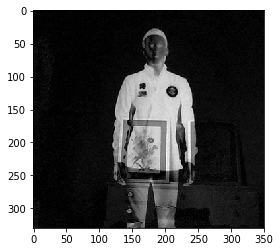

In [108]:
diff = cv2.absdiff(background.astype("uint8"), img_roi)
plt.imshow(diff,cmap='gray')

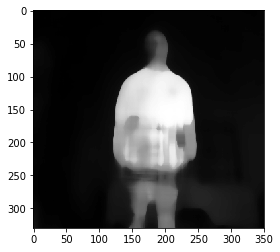

In [116]:
blur = cv2.medianBlur(diff,25)
plt.imshow(blur,cmap='gray')

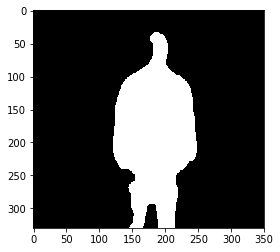

In [117]:
_ , th1 = cv2.threshold(blur, 25, 255, cv2.THRESH_BINARY)
plt.imshow(th1,cmap='gray')

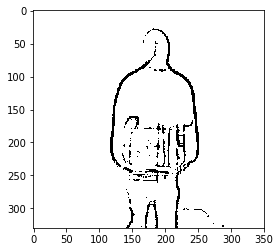

In [118]:
th2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(th2,cmap='gray')

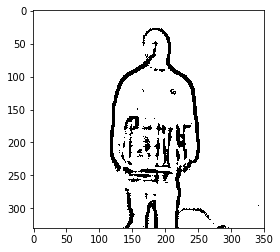

In [119]:
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(th3,cmap='gray')

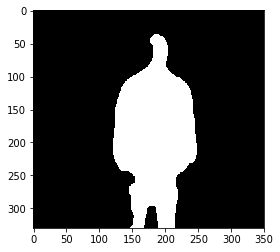

In [120]:
opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel=(5,5),iterations=3)
plt.imshow(opening,cmap='gray')

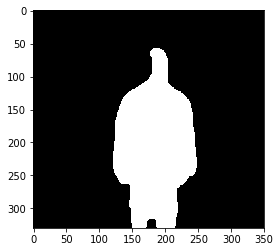

In [121]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel=(5,5),iterations=20)
plt.imshow(closing,cmap='gray')

In [122]:
image, contours, hierarchy = cv2.findContours(closing, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

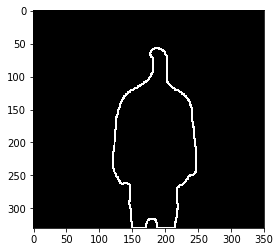

In [123]:
img_copy = np.zeros_like(img_roi)
# plt.imshow(img_copy,cmap='gray')
# For every entry in contours
for i in range(len(contours)):
    
    
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img_copy, contours, i, 255, 2)
        
#         # We can now draw the external contours from the list of contours
#         cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(img_copy,cmap='gray')

In [127]:
# Connects to your computer's default camera
cap = cv2.VideoCapture(0)

# Capture frame-by-frame
ret, frame = cap.read()
background_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
background_roi = background_roi[roi_y[0]:roi_y[1],roi_x[0]:roi_x[1]].copy().astype("float")

background = background_roi.copy().astype("float")

while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    frame_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_roi = frame_roi[roi_y[0]:roi_y[1],roi_x[0]:roi_x[1]] 
    
    # Display the resulting frame
    cv2.imshow('frame',frame_roi)
    
    diff = cv2.absdiff(background.astype("uint8"), frame_roi)
    cv2.imshow("zero background",diff)
    
    blur = cv2.medianBlur(diff,25)
    cv2.imshow("blur",blur)
    
    _ , th1 = cv2.threshold(blur, 25, 255, cv2.THRESH_BINARY)
    cv2.imshow("Binary thresh", th1)
    
    opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel=(5,5),iterations=3)
    cv2.imshow("opening", opening)
    
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel=(5,5),iterations=20)
    cv2.imshow("closing", closing)
    
    image, contours, hierarchy = cv2.findContours(closing, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    img_copy = np.zeros_like(image)
    # For every entry in contours
    
    if len(contours):
        body_segment = max(contours, key=cv2.contourArea)
        cv2.drawContours(img_copy, [body_segment], -1, 255,3)
        
    cv2.imshow("final", img_copy)
        
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

## Try using an automatic background remover

In [77]:

# Connects to your computer's default camera
cap = cv2.VideoCapture(0)

fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    frame_roi = frame[roi_y[0]:roi_y[1],roi_x[0]:roi_x[1]] 

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame_roi, cv2.COLOR_BGR2GRAY)
    
    fgmask = fgbg.apply(gray)
    
    # Display the resulting frame
    cv2.imshow('frame',gray)
     # Display the resulting frame
    cv2.imshow('fgmask',fgmask)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

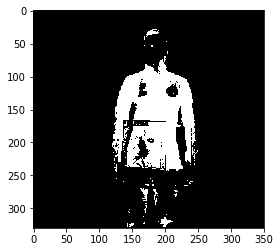

In [43]:
plt.imshow(output[2],cmap='gray')

In [ ]:
def calc_accum_avg(frame, accumulated_weight):
    '''
    Given a frame and a previous accumulated weight, computed the weighted average of the image passed in.
    '''
    
    # Grab the background
    global background
    
    # For first time, create the background from a copy of the frame.
    if background is None:
        background = frame.copy().astype("float")
        return None

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [ ]:
def segment(frame, threshold=25):
    global background
    
    # Calculates the Absolute Differentce between the backgroud and the passed in frame
    diff = cv2.absdiff(background.astype("uint8"), frame)

    # Apply a threshold to the image so we can grab the foreground
    # We only need the threshold, so we will throw away the first item in the tuple with an underscore _
    _ , thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    # Grab the external contours form the image
    # Again, only grabbing what we need here and throwing away the rest
    image, contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If length of contours list is 0, then we didn't grab any contours!
    if len(contours) == 0:
        return None
    else:
        # Given the way we are using the program, the largest external contour should be the hand (largest by area)
        # This will be our segment
        body_segment = max(contours, key=cv2.contourArea)
        
        # Return both the hand segment and the thresholded hand image
        return (thresholded, body_segment)

In [ ]:
cam = cv2.VideoCapture(0)

# Intialize a frame count
num_frames = 0

# keep looping, until interrupted
while True:
    # get the current frame
    ret, frame = cam.read()

    # flip the frame so that it is not the mirror view
    frame = cv2.flip(frame, 1)

    # clone the frame
    frame_copy = frame.copy()

    # Grab the ROI from the frame
    roi = frame

    # Apply grayscale and blur to ROI
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)

    # For the first 30 frames we will calculate the average of the background.
    # We will tell the user while this is happening
    if num_frames < 60:
        calc_accum_avg(gray, accumulated_weight)
        cv2.putText(frame_copy, "WAIT! GETTING BACKGROUND AVG.", (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        cv2.imshow("Something",frame_copy)
            
    else:
        # now that we have the background, we can segment the hand.
        
        # segment the hand region
        body = segment(gray)

        # First check if we were able to actually detect a body
        if body is not None:
            
            # unpack
            thresholded, body_segment = body

            # Draw contours around hand segment
            cv2.drawContours(frame_copy, [body_segment], -1, (255, 0, 0),1)

            # Also display the thresholded image
            cv2.imshow("Thesholded", thresholded)

    # Draw ROI Rectangle on frame copy
#     cv2.rectangle(frame_copy, (roi_left, roi_top), (roi_right, roi_bottom), (0,0,255), 5)

    # increment the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
#     cv2.imshow("Something", frame_copy)


    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()